In [28]:
%load_ext autoreload
%autoreload 2
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
import mlflow 

from datetime import datetime
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.python.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input

from common_params import data_dir, img_dir
from common_plots import plot_img
from data_load import get_train_val_set, apply_data_augmentation, prepare_subfolder_extract
from common_params import data_dir, img_dir, npy_dir, MAX_NUMBER_CLASS
from common_img_functions import read_img


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
print(tf.__version__)

2.11.0


In [4]:

IMG_SIZE = 224
batch_size = 32
image_size = (IMG_SIZE, IMG_SIZE)
input_shape = (IMG_SIZE, IMG_SIZE, 3) 

NB_IMG_PER_CLASS = 100 
NB_CLASS = 2 
num_epochs = 10 
list_of_folder = np.load(os.path.join(npy_dir,"top_breed_folder_list_30.npy"),  allow_pickle=True)

In [5]:
train_dir, test_dir = prepare_subfolder_extract(NB_IMG_PER_CLASS, NB_CLASS, list_of_folder) 

# Transfer learning using Xception 

In [47]:
labels

['n02085936-Maltese_dog', 'n02088094-Afghan_hound']

In [54]:
train_ds, validation_ds, class_names = get_train_val_set(train_dir, image_size, batch_size)
train_ds, validation_ds = apply_data_augmentation(train_ds, validation_ds)

Found 200 files belonging to 2 classes.
Using 160 files for training.
Using 40 files for validation.
Cause: could not parse the source code of <function get_train_val_set.<locals>.<lambda> at 0x000001D0542A7678>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
# coding=utf-8
(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function get_train_val_set.<locals>.<lambda> at 0x000001D0542A7678>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
# coding=utf-8
(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function get_train_val_set.<locals>.<lambda> at 0x000001D0542A7678>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
# coding=utf-8
(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function apply_data_augmentation.<locals>.<lambda> at 0x000001D04BF1C558>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
# coding=utf-8
(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
# coding=utf-8
(lambda x, y: (data_augmentation(x, training=True), y))
# coding=utf-8
(lambda img, label: (data_augmentation(img), label))
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function apply_data_augmentation.<locals>.<lambda> at 0x000001D04BF1C558>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
# coding=utf-8
(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
# coding=utf-8
(lambda x, y: (data_augmentation(x, training=True), y))
# coding=utf-8
(lambda img, label: (data_augmentation(img), label))
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function apply_data_augmentation.<locals>.<lambda> at 0x000001D04BF1C558>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
# coding=utf-8
(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
# coding=utf-8
(lambda x, y: (data_augmentation(x, training=True), y))
# coding=utf-8
(lambda img, label: (data_augmentation(img), label))
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [7]:
def get_xception_model():
    model = Sequential()
    model.add(Xception(include_top=False, pooling='avg', weights="imagenet"))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(NB_CLASS, activation='softmax'))
    model.layers[0].trainable = False
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
xmodel = get_xception_model()

In [9]:
experiment_name = "xception-transfert-learning-dog-breed-classifier"
run_name = datetime.now().strftime("%Y%m%d_%H%M%S")
logdir = os.path.join(data_dir,"logs", experiment_name, run_name)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir,  write_graph=True, histogram_freq=1)

history = xmodel.fit(x=train_ds, 
        epochs=num_epochs, 
        validation_data=validation_ds,
        callbacks=[tensorboard_callback])

Epoch 1/10
5/5 [==============================] - 13s 2s/step - loss: 0.4967 - accuracy: 0.7125 - val_loss: 2.2464 - val_accuracy: 0.4250
Epoch 2/10
5/5 [==============================] - 9s 2s/step - loss: 0.2498 - accuracy: 0.9000 - val_loss: 0.8846 - val_accuracy: 0.4250
Epoch 3/10
5/5 [==============================] - 11s 2s/step - loss: 0.1893 - accuracy: 0.9312 - val_loss: 1.5604 - val_accuracy: 0.6250
Epoch 4/10
5/5 [==============================] - 10s 2s/step - loss: 0.0972 - accuracy: 0.9750 - val_loss: 1.3834 - val_accuracy: 0.5750
Epoch 5/10
5/5 [==============================] - 10s 2s/step - loss: 0.2520 - accuracy: 0.9438 - val_loss: 1.8536 - val_accuracy: 0.6250
Epoch 6/10
5/5 [==============================] - 11s 2s/step - loss: 0.1136 - accuracy: 0.9750 - val_loss: 0.1828 - val_accuracy: 0.9250
Epoch 7/10
5/5 [==============================] - 11s 2s/step - loss: 0.0439 - accuracy: 0.9875 - val_loss: 0.0664 - val_accuracy: 0.9750
Epoch 8/10
5/5 [===================

In [10]:
logdir

'C:/dev/image_classification/data/logs\\xception-transfert-learning-dog-breed-classifier\\20230817_170116'

In [11]:
experiment_name

'xception-transfert-learning-dog-breed-classifier'

In [12]:
# Set the experiment name and create an MLflow run
mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name = run_name) as mlflow_run:
    
    mlflow.set_experiment_tag("transfer_learning", "xception")
    mlflow.set_tag("optimizer", "adam")
    mlflow.set_tag("loss", "categorical_crossentropy")

    mlflow.keras.log_model(xmodel, "model", keras_module='tensorflow.keras')

    # mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("num_epochs", num_epochs)
    mlflow.log_param("batch_size", batch_size)
    mlflow.log_param("input_shape", input_shape)

    mlflow.log_metric("train_loss", history.history["loss"][-1])
    mlflow.log_metric("train_acc", history.history["accuracy"][-1])
    mlflow.log_metric("val_loss", history.history["val_loss"][-1])
    mlflow.log_metric("val_acc", history.history["val_accuracy"][-1])

    # mlflow.log_artifact("model.png", "model_plot")

    mlflow_run_id = mlflow_run.info.run_id
    print("MLFlow Run ID: ", mlflow_run_id)

INFO:tensorflow:Assets written to: C:\Users\clara\AppData\Local\Temp\tmp02rfjp08\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\clara\AppData\Local\Temp\tmp02rfjp08\model\data\model\assets


MLFlow Run ID:  00beaf7f82a94fd2909cffe0d747c1f0


# Show single predictions  

load model 

In [30]:
test_img = read_img(os.path.join(data_dir , "extracted\\test\\n02085936-Maltese_dog\\n02085936_233_0.jpg"))
test_imge = np.expand_dims(test_img, axis=0)

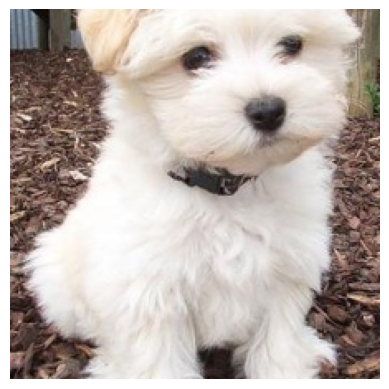

In [32]:
plot_img(test_img)

In [64]:
class_names_from_folder = [ name.split('-')[1] for name in class_names ]
predictions = xmodel.predict(test_imge)[0]
print(f"This image as a probability {round(100*predictions[0],2)}% {class_names_from_folder[0]} of and a probability { round(100*predictions[1],2)}% of {class_names_from_folder[1]}")

This image as a probability 11.55% Maltese_dog of and a probability 88.45% of Afghan_hound
